In [1]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(data_url)#.fillna(0).set_index("date")

In [2]:
df = df.fillna(0).set_index("date")
df.index = pd.to_datetime(df.index) 
dg = df[["iso_code","new_cases", "total_cases"]]
dh = dg[dg["iso_code"].isin(("AUT","USA","ITA"))]
#dg[dg["iso_code"]=="USA"]

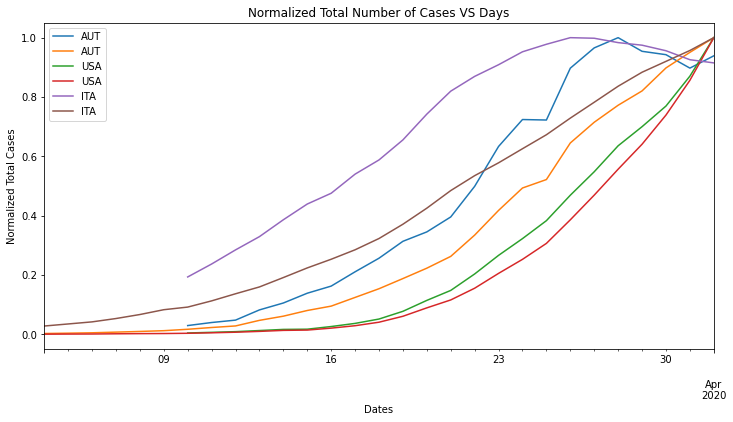

In [4]:
start_date = "2020-03-03"; end_date = "2020-04-01"

def dfstate(state, dg, st_dt, end_dt, ax):
    dfstat = dg[dg["iso_code"]==state]
    mask = (dfstat.index > start_date) & (dfstat.index <= end_date) 
    dfstat = dfstat.loc[mask]
    dfstat["MA_dni_"+state] = dfstat["new_cases"].rolling(window = 7).mean()
    dfstat = dfstat.iloc[:,1:].apply(lambda x: x / x.max(), axis=0)
    dfstat["MA_dni_"+state].plot(ax = axs, label = state)
    dfstat["total_cases"].plot(ax = axs, label = state)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(12, 6))
for state in states:
    dfstate(state, dg = dg, st_dt = start_date, end_dt = end_date, ax = axs)
plt.xlabel("Dates"); plt.ylabel("Normalized Total Cases"); plt.title("Normalized Total Number of Cases VS Days")
plt.legend()
plt.show()

Miscellanea below

In [3]:
dfstat = dh[dh["iso_code"]=="AUT"]
start_date = "2020-02-25"; end_date = "2020-05-08"
mask = (dfstat.index > start_date) & (dfstat.index <= end_date) 
dfstat = dfstat.loc[mask]
maxaut = dfstat.iloc[:,-2:].max()["total_cases"] / 89000
#https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=139.AME.A.AUT.1.0.0.0.ZUTN&periodSortOrder=ASC
dfstat = dfstat.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)

In [4]:
dfita = dh[dh["iso_code"]=="ITA"]
start_date = "2020-02-25"; end_date = "2020-05-08"
mask = (dfita.index > start_date) & (dfita.index <= end_date) 
dfita = dfita.loc[mask]
maxita = dfita.iloc[:,-2:].max()["total_cases"] / 600000 #https://www.istat.it/en/archivio/253831 /100 for percentage
dfita = dfita.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)

In [5]:
dfusa = dh[dh["iso_code"]=="USA"]
mask = (dfusa.index > start_date) & (dfusa.index <= end_date) 
dfusa = dfusa.loc[mask]
maxusa = dfusa.iloc[:,-2:].max()["total_cases"] / 3330000 #https://www.census.gov/popclock/
dfusa = dfusa.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)

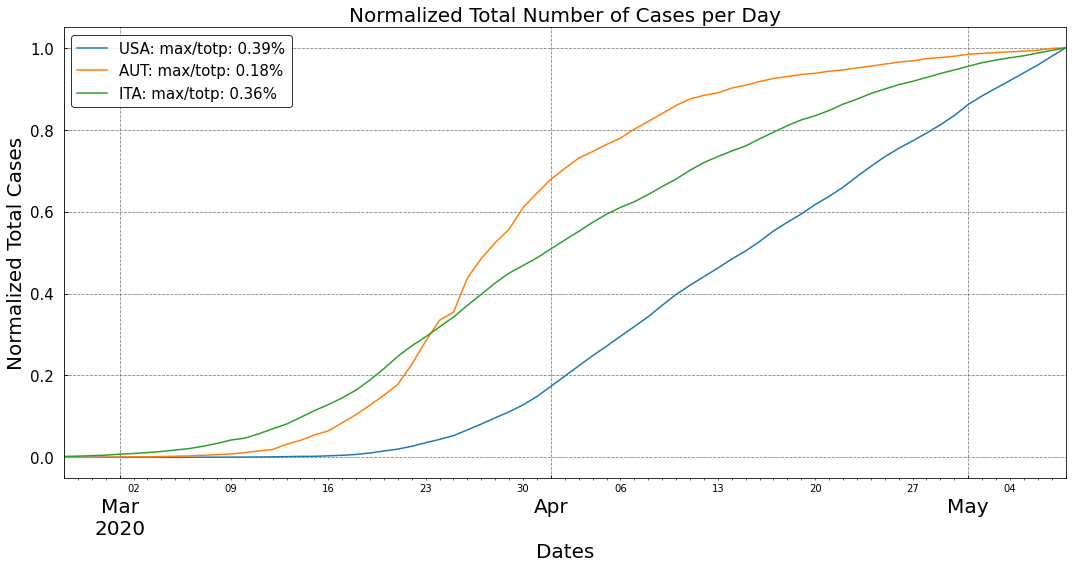

In [6]:
def rhu(n, decimals=0):
    import math
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier


import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize=(15, 8))
#dfusa = dh[dh["iso_code"]=="USA"]
#dfstatt = dh[dh["iso_code"]=="AUT"]
dfusa["total_cases"].plot(ax = axs, label = f"USA: max/totp: {rhu(maxusa,2)}%")
dfstat["total_cases"].plot(ax = axs, label = f"AUT: max/totp: {rhu(maxaut,2)}%")
dfita["total_cases"].plot(ax = axs, label = f"ITA: max/totp: {rhu(maxita,2)}%")


plt.grid(color = "grey", ls = "--")
plt.xlabel("Dates", fontsize = 20); plt.ylabel("Normalized Total Cases", fontsize = 20); 
plt.title("Normalized Total Number of Cases per Day", fontsize = 20)
plt.tick_params(axis = "both", labelsize = 15, direction="in", pad=10)
plt.tick_params(axis = "x", labelsize = 20, direction="in", pad=-25)

#plt.xticks(fontsize=10)
plt.tight_layout()
plt.legend(prop = {"size":15}, edgecolor = "k")
path_string = "/home/hal21/MEGAsync/Tour_Physics2.0/Thesis/NetSciThesis/Project/ComplexSpread/LateX/images/Introduction"
plt.savefig(f"{path_string}/COVID-RealStates.png", format="png", dpi=200)

In [3]:
#available states
states = ["AUT","USA","ITA"]
#states = ["USA"]
#states = dg["iso_code"].unique()[:3].tolist()
#states